In [78]:
import pandas as pd

In [79]:
alu_prices = pd.read_csv("../data/Aluminium Historical Data.csv")
gdp = pd.read_csv("../data/world gdp monthly.csv")
usd_index = pd.read_csv("../data/us-dollar-index-historical-chart.csv")
alu_production = pd.read_csv("../data/aluminuim_production.csv")
energy_index = pd.read_csv("../data/Global price of Energy index.csv")
usd_cad = pd.read_csv("../data/usd_canadian_dollar.csv")
usd_rupee = pd.read_csv("../data/usd_indian_rupee.csv")
usd_ruble = pd.read_csv("../data/usd_russian_ruble.csv")
usd_yuan = pd.read_csv("../data/CNY=X.csv")
gas = pd.read_csv("./Data/NaturalGas.csv")
oil = pd.read_csv("./Data/IR14200.csv")
zinc = pd.read_csv("../data/data with all factorst1.0.csv")

In [80]:
nickel = zinc[["Unnamed: 0", "nickel_price"]]
zinc = zinc[["Unnamed: 0", "zinc_price"]]


In [81]:
alu_production = alu_production[["Date", "Africa", "North America", "South America", "Asia (ex China)", "Western & Central Europe", "Russia & Eastern Europe", "Oceania", "Gulf Cooperation Council", "China (Estimated)", "Estimated Unreported to IAI"]]
alu_production["Total"] = alu_production.sum(axis="columns", numeric_only=True)
alu_production["Date"] = pd.to_datetime(alu_production["Date"], format="%d/%m/%Y")
alu_production.rename(columns={"Total":"Production_total"}, inplace=True)
energy_index["DATE"] = pd.to_datetime(energy_index["DATE"], format="%Y-%m-%d")
energy_index.rename(columns={"DATE":"Date", "PNRGINDEXM":"Energy_index"}, inplace=True)
usd_rupee["Date"] = pd.to_datetime(usd_rupee["Date"], format="%Y-%m-%d")
usd_cad["Date"] = pd.to_datetime(usd_cad["Date"], format="%Y-%m-%d")
usd_ruble["Date"] = pd.to_datetime(usd_ruble["Date"], format="%Y-%m-%d")
usd_yuan["Date"] = pd.to_datetime(usd_yuan["Date"], format="%Y-%m-%d")
usd_rupee.rename(columns={"Open":"Open_usd_rupee"}, inplace=True)
usd_ruble.rename(columns={"Open":"Open_usd_ruble"}, inplace=True)
usd_yuan.rename(columns={"Open":"Open_usd_yuan"}, inplace=True)
usd_cad.rename(columns={"Open":"Open_usd_cad"}, inplace=True)

In [82]:

zinc.rename(columns={"Unnamed: 0": "Date"}, inplace=True)
nickel.rename(columns={"Unnamed: 0": "Date"}, inplace=True)
zinc["Date"] = pd.to_datetime(zinc["Date"])
nickel["Date"] = pd.to_datetime(nickel["Date"])

In [83]:
oil["DATE"] = pd.to_datetime(oil["DATE"])
oil.rename(columns={"DATE":"Date", "IR14200":"Oil"}, inplace=True)
gas["DATE"] = pd.to_datetime(gas["DATE"])
gas.rename(columns={"DATE":"Date", "PNGASEUUSDM":"Natural Gas"}, inplace=True)

In [84]:
gdp["Date"] = pd.to_datetime(gdp["Date"])

In [85]:
usd_index["Date"] = pd.to_datetime(usd_index["Date"], format="%d/%m/%Y")

In [86]:
alu_prices["Date"] = pd.to_datetime(alu_prices["Date"]) 

In [87]:
alu_prices.Price = alu_prices.Price.apply(lambda x: x.replace(",", ""))
alu_prices["Price"] = alu_prices["Price"].astype("float")

In [88]:
test_df = pd.merge(left=alu_prices[["Date", "Price"]], right=gdp, on="Date", how="left")
test_df = pd.merge(left=test_df, right=usd_index, on="Date", how="left")
test_df = pd.merge(left=test_df, right=alu_production, on="Date", how="left")
test_df = pd.merge(left=test_df, right=energy_index, on="Date", how="left")
test_df = pd.merge(left=test_df, right=usd_ruble[["Date", "Open_usd_ruble"]], on="Date", how="left")
test_df = pd.merge(left=test_df, right=usd_rupee[["Date", "Open_usd_rupee"]], on="Date", how="left")
test_df = pd.merge(left=test_df, right=usd_cad[["Date", "Open_usd_cad"]], on="Date", how="left")
test_df = pd.merge(left=test_df, right=usd_yuan[["Date", "Open_usd_yuan"]], on="Date", how="left")
test_df = pd.merge(left=test_df, right=nickel, on="Date", how="left")
test_df = pd.merge(left=test_df, right=zinc, on="Date", how="left")
test_df = pd.merge(left=test_df, right=oil, on="Date", how="left")
test_df = pd.merge(left=test_df, right=gas, on="Date", how="left")

In [89]:
test_df = test_df.sort_values("Date")

In [90]:
test_df = test_df.fillna(method="ffill")

In [91]:
test_df.dropna(inplace=True)

In [92]:
import pandas as pd
from sklearn import linear_model

In [93]:
from mlxtend.preprocessing import minmax_scaling
test = minmax_scaling(test_df[["Price", "Energy_index", "USD_index", "Production_total"]], columns=["Price", "Energy_index", "USD_index", "Production_total"])
x = test[["Energy_index", "USD_index", "Production_total"]]
y = test["Price"]


In [94]:
x = test_df[["Energy_index", "USD_index", "Production_total"]]
y = test_df["Price"]

In [95]:
x = test_df[["GDP", "USD_index", "Production_total", "Energy_index", "Open_usd_ruble", "Open_usd_rupee", "Open_usd_cad", "Open_usd_yuan", "zinc_price", "nickel_price"]]
y = test_df["Price"]

In [96]:
x = test_df[test_df.columns[2:]]
y = test_df["Price"]

In [113]:
regr = linear_model.LinearRegression()
regr.fit(x, y)



LinearRegression()

In [98]:
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

Intercept: 
 4261.176638336312
Coefficients: 
 [-3.06152822e-01 -4.40778624e+00 -2.85876340e-03 -2.47907799e+00
 -2.16260356e+00  3.20772501e+00  5.07291547e+00 -8.47027788e+00
 -5.40012019e+00  4.77229765e+00 -1.62633088e-01  5.53822377e+00
 -8.64095847e-02  1.39550793e+00  9.00184955e+00 -2.70733656e+01
 -1.82448687e+03  8.03527218e+01 -1.92667586e-02  4.89233851e-02
  9.57206939e+00 -4.29947689e+00]


In [99]:
import matplotlib.pyplot as plt
import seaborn as sns

d:\Uni\3. Semester\Projektseminar\tkseminar\tkseminar\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


'\n\nplt.plot(test_df["Date"].iloc[-90:], predictions, label="Regression")\nplt.plot(test_df["Date"].iloc[-90:], y.iloc[-90:], label = "Historical Aluminium Price")\nplt.ylabel("Aluminium Price in USD")\nplt.xlabel("Time")\nplt.legend(loc="upper left")\n\nticker_spacing = 1\nplt.set_xticks\nplt.xticks(np.arange(min(test_df["Date"].iloc[-90:],), max(test_df["Date"].iloc[-90:],)+1, 1.0))'

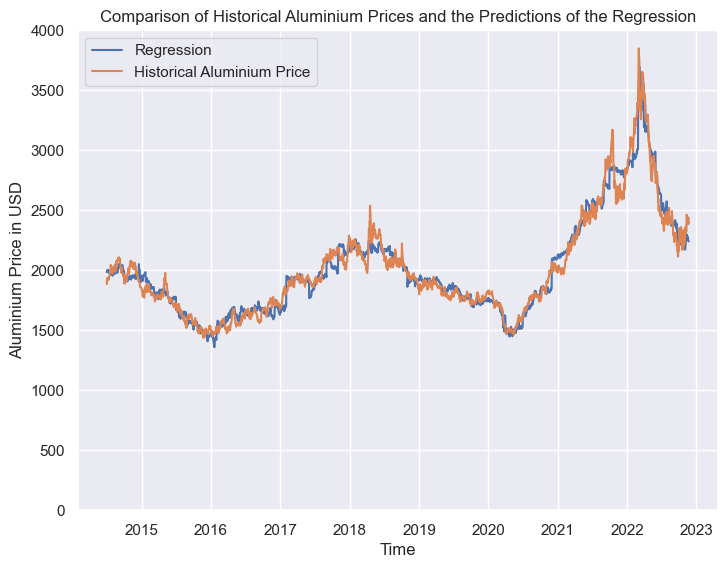

In [114]:
import numpy as np
import matplotlib.ticker as ticker
predictions = regr.predict(x.to_numpy())

sns.set_theme(style="darkgrid")

fig = plt.figure()
ax1 = fig.add_axes((1,1,1,1))
ax1.plot(test_df["Date"], predictions, label="Regression")
#ax2 = fig.add_axes((1,1,1,1), sharex=ax1, sharey=ax1)
ax1.plot(test_df["Date"], y, label = "Historical Aluminium Price")
ax1.set_xlabel("Time")
ax1.set_ylabel("Aluminium Price in USD")
#plt.plot(test_df["Date"].iloc[-90:], y.iloc[-90:], label = "Historical Aluminium Price")
#ax1.set_xticks(ax1.get_xticks()[::2])
ax1.legend()
ax1.set_title("Comparison of Historical Aluminium Prices and the Predictions of the Regression")
plt.ylim([0, 4000])
plt.plot()
"""

plt.plot(test_df["Date"].iloc[-90:], predictions, label="Regression")
plt.plot(test_df["Date"].iloc[-90:], y.iloc[-90:], label = "Historical Aluminium Price")
plt.ylabel("Aluminium Price in USD")
plt.xlabel("Time")
plt.legend(loc="upper left")

ticker_spacing = 1
plt.set_xticks
plt.xticks(np.arange(min(test_df["Date"].iloc[-90:],), max(test_df["Date"].iloc[-90:],)+1, 1.0))"""



In [101]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [102]:
print(mean_absolute_error(y.iloc[-90:], predictions))
print(mean_squared_error(y[-90:], predictions))

79.11215579935713
8915.171323730818


C:\Users\rnoeske\AppData\Local\Temp\ipykernel_14832\291077241.py:2: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  print(mean_squared_error(y[-90:], predictions))


In [103]:
test_df["Price"].iloc[-90:].mean()

2331.6055555555554

In [104]:
mean_absolute_error(y.iloc[-90:], predictions) / test_df["Price"].iloc[-90:].mean()

0.0339303342329303

In [105]:
test_df.columns

Index(['Date', 'Price', 'GDP', 'USD_index', 'Africa', 'North America',
       'South America', 'Asia (ex China)', 'Western & Central Europe',
       'Russia & Eastern Europe', 'Oceania', 'Gulf Cooperation Council',
       'China (Estimated)', 'Estimated Unreported to IAI', 'Production_total',
       'Energy_index', 'Open_usd_ruble', 'Open_usd_rupee', 'Open_usd_cad',
       'Open_usd_yuan', 'nickel_price', 'zinc_price', 'Oil', 'Natural Gas'],
      dtype='object')

In [106]:
test_df.rename(columns={"Price": "Aluminium Price", "USD_index": "USD Index", "Production_total": "Global Aluminium Production", "Open_usd_rupee":"USD Rupee Ex.", "Open_usd_cad": "USD CAD Ex.", "Open_usd_ruble": "USD Ruble Ex.", "Open_usd_yuan": "USD Yuan Ex.", "zinc_price":"Zinc Price", "nickel_price":"Nickel Price", "Energy_index":"Energy Index"}, inplace=True)

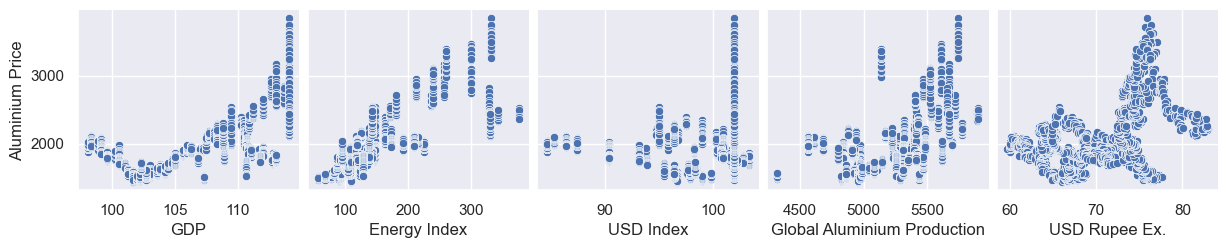

In [107]:
sns.pairplot(data=test_df, y_vars=["Aluminium Price"], x_vars=["GDP", "Energy Index", "USD Index", "Global Aluminium Production", "USD Rupee Ex."])

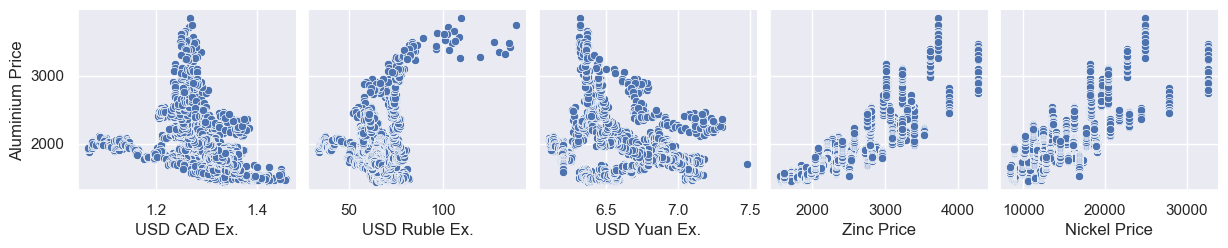

In [108]:
sns.pairplot(data=test_df, y_vars=["Aluminium Price"], x_vars=["USD CAD Ex.", "USD Ruble Ex.", "USD Yuan Ex.", "Zinc Price", "Nickel Price"])

In [109]:
test_df

,Date,Aluminium Price,GDP,USD Index,Africa,North America,South America,Asia (ex China),Western & Central Europe,Russia & Eastern Europe,...,Global Aluminium Production,Energy Index,USD Ruble Ex.,USD Rupee Ex.,USD CAD Ex.,USD Yuan Ex.,Nickel Price,Zinc Price,Oil,Natural Gas
2124,2014-07-01,1884.5,98.040533,84.719,144.0,386.0,117.0,203.0,306.0,319.0,...,4567.0,225.162905,33.857201,60.053001,1.06709,6.1938,18970.0,2195.0,150.5,9.400000
2123,2014-07-02,1926.0,98.040533,84.719,144.0,386.0,117.0,203.0,306.0,319.0,...,4567.0,225.162905,34.332199,60.028000,1.06350,6.1900,18970.0,2195.0,150.5,9.400000
2122,2014-07-03,1936.0,98.040533,84.719,144.0,386.0,117.0,203.0,306.0,319.0,...,4567.0,225.162905,34.273201,59.685001,1.06675,6.2006,18970.0,2195.0,150.5,9.400000
2121,2014-07-04,1921.5,98.040533,84.719,144.0,386.0,117.0,203.0,306.0,319.0,...,4567.0,225.162905,34.169201,59.733002,1.06370,6.2020,18970.0,2195.0,150.5,9.400000
2120,2014-07-07,1919.5,98.040533,84.719,144.0,386.0,117.0,203.0,306.0,319.0,...,4567.0,225.162905,34.450199,59.717999,1.06520,6.1941,18970.0,2195.0,150.5,9.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,2022-11-16,2412.0,114.072071,101.954,135.0,301.0,115.0,380.0,237.0,332.0,...,5669.0,330.149586,60.465000,81.071404,1.32735,7.0430,22950.0,2752.0,216.3,55.179127
3,2022-11-17,2391.0,114.072071,101.954,135.0,301.0,115.0,380.0,237.0,332.0,...,5669.0,330.149586,60.740002,81.495300,1.33355,7.0872,22950.0,2752.0,216.3,55.179127
2,2022-11-18,2430.0,114.072071,101.954,135.0,301.0,115.0,380.0,237.0,332.0,...,5669.0,330.149586,60.365002,81.524902,1.33214,7.1562,22950.0,2752.0,216.3,55.179127
1,2022-11-21,2384.5,114.072071,101.954,135.0,301.0,115.0,380.0,237.0,332.0,...,5669.0,330.149586,60.035000,81.519897,1.33769,7.1189,22950.0,2752.0,216.3,55.179127
